### Лабораторная работа 6

In [2]:
import numpy as np

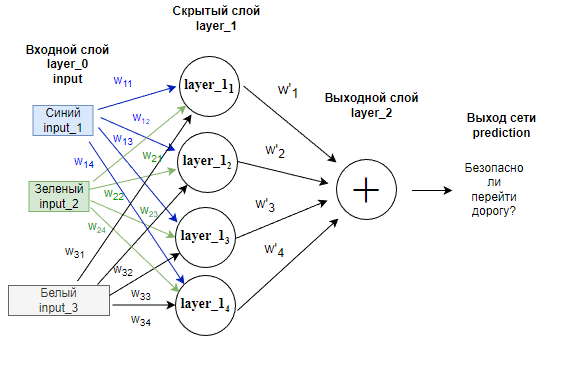

Введем обозначения:


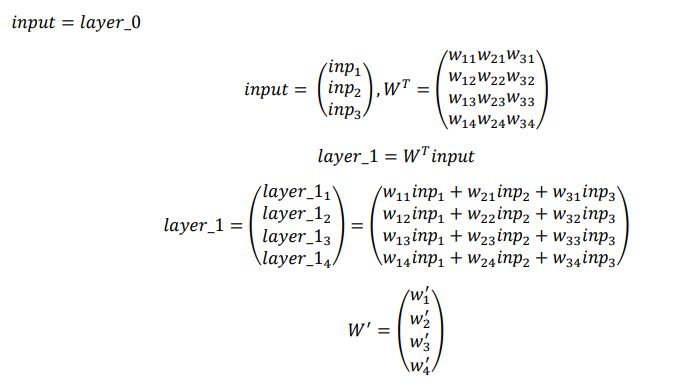

Обратный проход.
1. Коррекция весов W'. Та же процедура, что вы реализовывали ранее:



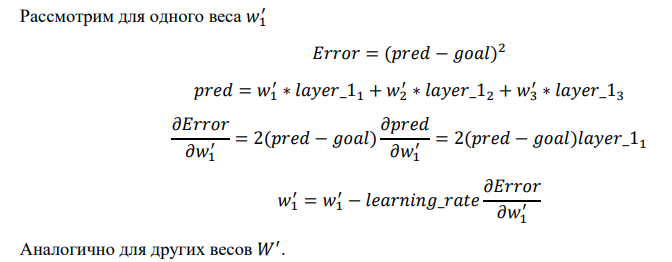

2.	Коррекция весов W:

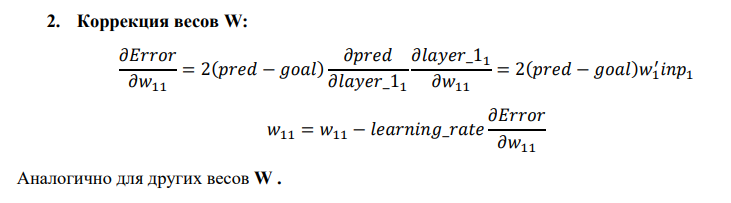

1. Реализуйте 1 итерацию обратного распространения. На выбор для 1 точки, для всех данных или для батча. Желательно в векторном виде.

In [14]:
np.random.seed(1)

lights = np.array( [[ 1, 0, 1 ],
                    [ 0, 1, 1 ],
                    [ 0, 0, 1 ],
                    [ 1, 1, 1 ] ] )

walk_stop = np.array([[ 1, 1, 0, 0]]).T # (batch_size x out)

learning_rate = 0.2
hidden_size = 3

weights_0_1 = 2 * np.random.random((3, hidden_size)) - 1 # (n_features x out_features)
weights_1_2 = 2 * np.random.random((hidden_size, 1)) - 1 # (out_features, out)

print(f'Old weights:')
print(f'W1 = \n{weights_0_1}\n')
print(f'W2 = \n{weights_1_2}\n')

iterations = 1
batch_size = len(lights)
for i in range(0, iterations, batch_size):
    # Fetching the current package:
    input = lights[i : i + batch_size] # (batch_size x n_features)
    target = walk_stop[i : i + batch_size] # (batch_size x out)
    # Forward Pass:
    x = input @ weights_0_1 # (batch_size x n_features) @ (n_features x out_features) = (batch_size x out_features)
    out = x @ weights_1_2 # (batch_size x out_features) @ (out_features, out) = (batch_size x out)
    # Backward Pass:
    grad_w2 = 2.0 * x.T @ (out - target) # (out_features, batch_size) @ (batch_size x out) = (out_features, out)
    grad_w1 = 2.0 * input.T @ (out - target) # (n_features x batch_size) @ (batch_size x out) = (n_features x out)
    grad_w1 = grad_w1 @  weights_1_2.T # (n_features x out) @ (out x out_features) = (n_features x out_features)
    # Weight Update:
    weights_1_2 -= learning_rate * grad_w2
    weights_0_1 -= learning_rate * grad_w1

print(f'New weights:')
print(f'W1 = \n{weights_0_1}\n')
print(f'W2 = \n{weights_1_2}\n')


Old weights:
W1 = 
[[-0.16595599  0.44064899 -0.99977125]
 [-0.39533485 -0.70648822 -0.81532281]
 [-0.62747958 -0.30887855 -0.20646505]]

W2 = 
[[ 0.07763347]
 [-0.16161097]
 [ 0.370439  ]]

New weights:
W1 = 
[[-0.09521632  0.29338896 -0.66222698]
 [-0.33192097 -0.83849803 -0.51273456]
 [-0.51422477 -0.54464309  0.33394617]]

W2 = 
[[-1.31190214]
 [-0.78778135]
 [-1.50773848]]

